In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [139]:
%run scripts/helper.py
%matplotlib inline

In [2]:
magazino_train = load_data('./train.csv/train.csv', index_col='id')
magazino_test = load_data('./test.csv', index_col='id')

In [3]:
magazino_train.columns = trim_column(magazino_train)
magazino_test.columns = trim_column(magazino_test)

In [28]:
y = get_target(magazino_train, 'shares')

In [4]:
magazino_train.columns

Index([u'n_tokens_title', u'n_tokens_content', u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens', u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos', u'average_token_length', u'num_keywords', u'category_article', u'kw_min_min', u'kw_max_min', u'kw_avg_min', u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg', u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares', u'self_reference_max_shares', u'self_reference_avg_sharess', u'day_of_publishing', u'lda_00', u'lda_01', u'lda_02', u'lda_03', u'lda_04', u'global_subjectivity', u'global_sentiment_polarity', u'global_rate_positive_words', u'global_rate_negative_words', u'rate_positive_words', u'rate_negative_words', u'avg_positive_polarity', u'min_positive_polarity', u'max_positive_polarity', u'avg_negative_polarity', u'min_negative_polarity', u'max_negative_polarity', u'title_subjectivity', u'title_sentiment_polarity', u'abs_title_subjectivity', u'abs_title_sentiment_polarity', u'shares'], dtype='objec

In [5]:
# lets analyze day of publishing variable with shares
m = magazino_train.groupby(['day_of_publishing'])

In [7]:
m.size()

day_of_publishing
Friday               3591
Monday               4248
Saturday             1478
Sunday               1690
Thursday             4651
Tuesday              4566
Wednesday            4651
dtype: int64

In [16]:
m.get_group('Monday').shares.describe()

count      4248.000000
mean       3799.951036
std       17323.240526
min           4.000000
25%         918.000000
50%        1400.000000
75%        2700.000000
max      690400.000000
Name: shares, dtype: float64

In [17]:
m.get_group('Tuesday').shares.describe()

count      4566.000000
mean       3176.082129
std        9503.604192
min           5.000000
25%         906.000000
50%        1400.000000
75%        2600.000000
max      306100.000000
Name: shares, dtype: float64

In [18]:
m.get_group('Wednesday').shares.describe()

count      4651.000000
mean       3203.566115
std       10429.828578
min          42.000000
25%         916.000000
50%        1300.000000
75%        2500.000000
max      441000.000000
Name: shares, dtype: float64

In [19]:
m.get_group('Thursday').shares.describe()

count      4651.000000
mean       3136.888841
std        7707.936442
min          23.000000
25%         887.000000
50%        1300.000000
75%        2600.000000
max      158900.000000
Name: shares, dtype: float64

In [20]:
m.get_group('Friday').shares.describe()

count      3591.000000
mean       3284.901142
std        8809.404925
min          22.000000
25%         973.000000
50%        1400.000000
75%        2700.000000
max      233400.000000
Name: shares, dtype: float64

In [21]:
m.get_group('Saturday').shares.describe()

count      1478.000000
mean       4111.504060
std       17204.191234
min          49.000000
25%        1300.000000
50%        2000.000000
75%        3600.000000
max      617900.000000
Name: shares, dtype: float64

In [22]:
m.get_group('Sunday').shares.describe()

count     1690.000000
mean      3807.247337
std       6418.436511
min         89.000000
25%       1200.000000
50%       1900.000000
75%       3700.000000
max      83300.000000
Name: shares, dtype: float64

In [23]:
features = return_features(magazino_train)
features_test = return_features(magazino_test)

In [24]:
def checkday(x):
    if x == 'Monday' or x == 'Saturday':
        return 1
    else:
        return 0
    
features['is_mon_or_sat'] = magazino_train.day_of_publishing.map(checkday)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
features_test['is_mon_or_sat'] = magazino_test.day_of_publishing.map(checkday)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
g = magazino_train.groupby('category_article')

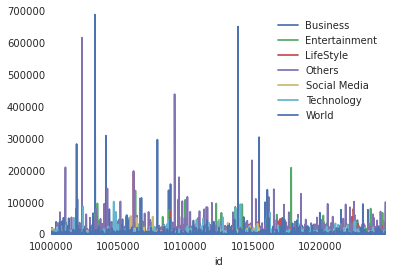

In [107]:
g.shares.plot()
plt.legend();

In [108]:
category_articles_train = pd.get_dummies(magazino_train.category_article, prefix='category_')
category_articles_test = pd.get_dummies(magazino_test.category_article, prefix='category_')

In [109]:
features = pd.concat([features, category_articles_train], axis=1)
features_test = pd.concat([features_test, category_articles_test], axis=1)

In [110]:
Xt, Xv, yt, yv = split_data(features, y)

### Training

In [140]:
model = build_model(Xt, yt)

In [141]:
yt_pred = model.predict(Xt)

In [142]:
print 'RMSE on training set %0.4f ' %(RMSE(yt, yt_pred))

RMSE on training set 701.3115 


In [143]:
yv_pred = model.predict(Xv)

In [144]:
print 'RMSE on test set %0.4f ' %(RMSE(yv, yv_pred))

RMSE on test set 8543.7965 


In [117]:
model = build_model(features, y)

In [118]:
final_preds = model.predict(features_test)

In [119]:
make_submission(magazino_test.index.values, final_preds, 'linear_regression_optimize.csv')